### <center>Емельянов Даниил</center>

## <center>Курс "Введение в анализ данных"</center>

## <center>Лабораторная работа №2. Supervised Learning</center>

## Table of contents  
1. [Часть 1. Первичный анализ данных](#Часть-1.-Первичный-анализ-данных)
    * [Задание 1](#Задание-1)
    * [Задание 2](#Задание-2)
    * [Задание 3](#Задание-3)
    * [Задание 4](#Задание-4)
    * [Задание *](#Задание-*)
2. [Часть 2. Машинное обучение](#Часть-2.-Машинное-обучение)
    * [Задание 1. Регрессия](#Задание-1.---Регрессия)
        * [Линейная регрессия](#Линейная-регрессия)
        * [Гребневая регрессия](#Гребневая-регрессия)
        * [Лассо-регрессия](#Лассо-регрессия)
        * [KNN](#KNN)
        * [Radius NN](#Radius-NN)
        * [Random Forest](#Random-Forest)
    * [Задание 2. Бинарная классификация](#Задание-2.--Бинарная-классификация)
        * [Метод ближайших соседей](#Метод-ближайших-соседей)
        * [Логистическая регрессия](#Логистическая-регрессия)
        * [Дерево решений](#Дерево-решений)
        * [Random Forest](#Random-Forest')
    * [Задание 3. Многоклассовая классификация](#Задание-3.--Многоклассовая-классификация)
        * [Метод ближайших соседей](#Метод-ближайших-соседей.)
        * [Логистическая регрессия](#Логистическая-регрессия.)
        * [Дерево решений](#Дерево-решений.)
        * [Random Forest](#Random-Forest.)

## Данные

В рамках данной лабораторной работы предлагается проанализировать набор данных о студентах двух школ в Португалии. В наборе данных `students_data.csv` представлена информация о студентах, посещающих два курса - математику (`Math`) и поргутальский язык (`Por`). Некоторые студенты представлены в обоих курсах, некоторые только в одном. Для каждого студента известны три оценки по курсу: оценка за первое полугодие (`G1`), оценка за второе полугодие (`G2`) и итоговая оценка за год (`G3`).

In [1]:
import numpy as np
import pandas as pd

# будем отображать графики прямо в jupyter'e
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# стиль seaborn
from matplotlib import style
style.use('seaborn')

#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

In [2]:
pd.set_option('display.max_columns', 40)

pd.set_option('display.max_colwidth', -1)

In [3]:
data = pd.read_csv("students_data.csv")

data.shape

(1044, 35)

In [4]:
data.head(15)

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,100097,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3,2,1,1,4,5,12,15,13,14
1,101021,Por,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,no,no,no,yes,no,yes,yes,no,5,3,4,1,3,3,2,17,18,17
2,102965,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,no,no,no,no,no,yes,yes,no,4,4,5,3,5,5,0,9,8,10
3,102989,Por,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4,4,3,1,1,3,4,14,15,16
4,103131,Por,GP,F,16,U,GT3,T,1,1,at_home,other,home,mother,2,1,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,4,5,2,12,13,13
5,103144,Por,GP,M,18,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,yes,yes,yes,yes,yes,3,3,4,4,5,4,2,11,11,12
6,105257,Por,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
7,107639,Por,MS,F,15,R,GT3,T,4,4,teacher,other,course,mother,2,1,0,no,no,no,no,yes,yes,yes,yes,1,5,1,3,5,5,0,13,14,14
8,107914,Math,GP,F,15,U,LE3,T,3,2,services,other,reputation,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,4,4,1,1,5,10,7,6,6
9,108089,Por,MS,M,16,R,GT3,T,3,4,other,health,other,mother,3,2,0,no,no,no,no,no,yes,no,no,3,4,5,1,2,5,4,9,10,11


### Признаки

Данные представлены признаками различных типов: числовыми, категориальными, упорядоченными категориальными.

**Описание признаков:**

In [5]:
pd.read_csv('students_data_features.csv',
            delimiter=';',
            encoding='windows-1251')

,Признак,Описание
0,ID,Уникальный номер наблюдения
1,Subject,"Предмет: 'Math' - математика, 'Por' - португальский язык"
2,school,"Школа: 'GP' - Gabriel Pereira, 'MS' - Mousinho da Silveira"
3,sex,"Пол студента: 'F' - женский, 'M' - мужской"
4,age,Возраст студента
5,address,"Место проживания студента: 'U' - в городе, 'R' - за городом"
6,famsize,"Число членов семьи: 'LE3' - если <= 3, 'GT3' - если > 3"
7,Pstatus,"Отношения родителей: 'T' - живут вместе, 'A' - живут раздельно"
8,Medu,"Образование матери: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"
9,Fedu,"Образование отца: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"


## Часть 1. Первичный анализ данных

### Задание 1  
  
* Проверьте, присутствуют ли в данных пропущенные значения. Сколько? В каких признаках? Удалите наблюдения с пропущенными значениями при наличии таковых.  

In [6]:
data.isnull().values.any()

False

In [7]:
data.isin(['?']).values.any()

False

В данных пропущенные значения отсутствуют.

* Для каждого признака определите, к какому типу он относится. При необходимости, приведите признак к определенному вами типу.  

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 35 columns):
ID            1044 non-null int64
Subject       1044 non-null object
school        1044 non-null object
sex           1044 non-null object
age           1044 non-null int64
address       1044 non-null object
famsize       1044 non-null object
Pstatus       1044 non-null object
Medu          1044 non-null int64
Fedu          1044 non-null int64
Mjob          1044 non-null object
Fjob          1044 non-null object
reason        1044 non-null object
guardian      1044 non-null object
traveltime    1044 non-null int64
studytime     1044 non-null int64
failures      1044 non-null int64
schoolsup     1044 non-null object
famsup        1044 non-null object
paid          1044 non-null object
activities    1044 non-null object
nursery       1044 non-null object
higher        1044 non-null object
internet      1044 non-null object
romantic      1044 non-null object
famrel        1044 non-nu

Для первоначального анализа (для статистики и графиков) типы признаков подходят; чуть позже, перед обучением, мы заменим типы признаков.

* Посчитайте базовые статистики для числовых и для категориальных признаков.

In [9]:
data.describe()

,ID,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,547057.190613,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,263827.330362,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,100097.000000,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,324017.500000,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,554339.500000,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,774486.000000,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,999194.000000,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


**Интересные замечания:**
1. Образование у матерей в среднем немного выше, чем у отцов.
2. В среднем студенты живут вблизи школы (и правда удивительно).
3. Отношения в семьях в среднем хорошие.
4. У студентов достаточно свободного времени.
5. Студенты в среднем мало пьют.
6. У студентов нормальное здоровье, почти хорошее.
7. В среднем студенты пропустили 4 раза занятия.

In [10]:
data.describe(include=['O'])

,Subject,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044
unique,2,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,Por,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,no,yes,yes,yes,no
freq,649,772,591,759,738,923,399,584,430,728,925,640,824,528,835,955,827,673


**Интересные замечания:**
1. 76% студентов живут в городе.
2. 88% семей, в которых родители живут вместе (ну и слава богу!).
3. 88% студентов не имееют дополнительной помощи от школы.
4. Почти все студенты собираются получать высшее образование.
5. Примерно 64% имеют романтические отношения.

### Задание 2  

Оцените распределение оценок (отдельно для `G1`, `G2` и `G3`). Сравните распределения для разных предметов - математики и португальского языка. Сделайте выводы.  

**Tip:** Для выполнения задания пригодятся графики плотности, гистограммы и боксплоты.

#### Гистограммы для каждой оценки

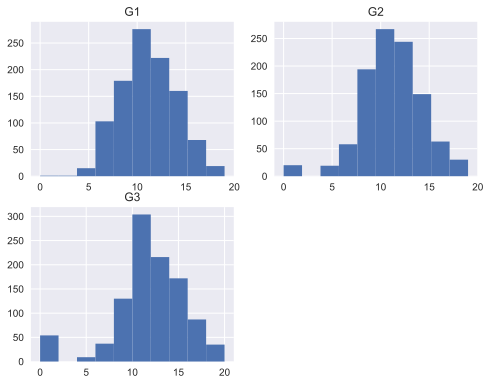

In [11]:
fig = plt.figure()
fig.set_figwidth(8)
fig.set_figheight(6.25)

g1 = fig.add_subplot(221)
g1.hist(data.G1)
g1.set_title('G1')

g2 = fig.add_subplot(222)
g2.hist(data.G2)
g2.set_title('G2')

g3 = fig.add_subplot(223)
g3.hist(data.G3)
g3.set_title('G3')

plt.show()

In [12]:
data_boxplot = data[['Subject']+['G1']+['G2']+['G3']]

#### Боксплоты для каждой оценки

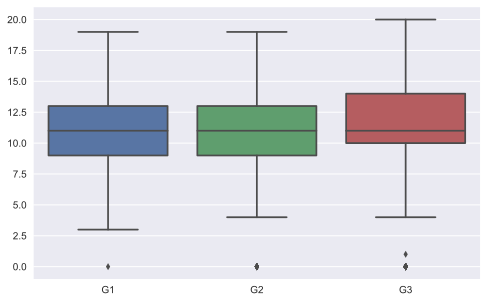

In [13]:
sns.boxplot(data=data_boxplot)
plt.show()

На графиках мы можем увидеть, что оценки распределены нормально. Также можно заметить, что после первого полугодия оценки в среднем увеличились. А судя по итоговым оценкам, еще появились отличники. 

#### Распределение различных оценок для каждого предмета

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0C1397D0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0C16A610>], dtype=object)

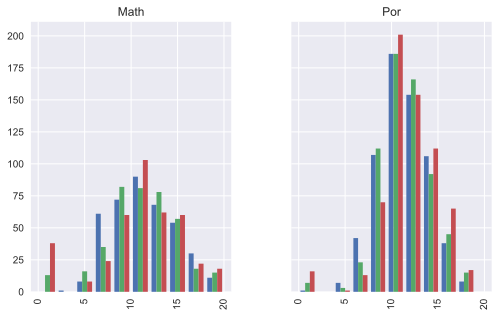

In [14]:
data_boxplot.hist(by='Subject', sharex=True, sharey=True)

Из данного графика мы можем сделать следующие выводы:
1. Итоговые оценки для двух предметов оказались лучше оценок за полугодия.
2. Отличников и двоечников больше по математике.

### Задание 3  

In [15]:
data_grade = data[['G3']+['sex']+['traveltime']+['schoolsup']+['famsup']+['paid']+['internet']+['romantic']+['Dalc']+['Walc']+['freetime']]
data_grade['all'] = ""

Оцените зависимость итоговой оценки от следующих признаков: 
  
* Пола

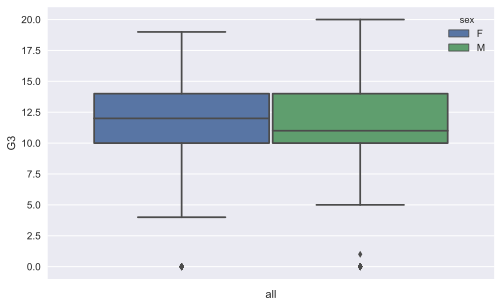

In [16]:
sns.boxplot(data=data_grade, x='all', y='G3', hue='sex')
plt.show()

* Времени в пути от дома до школы

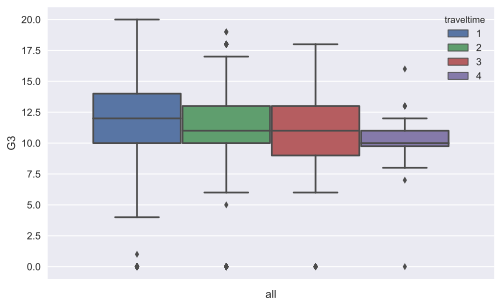

In [17]:
sns.boxplot(data=data_grade, x='all', y='G3', hue='traveltime')
plt.show()

* Наличия дополнительной помощи в учебе (от членов семьи или вообще)

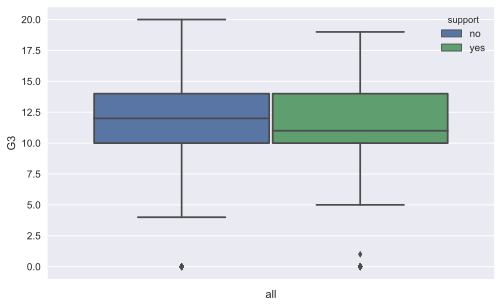

In [18]:
def support_column(data):
    sup_col = pd.Series()
    
    for i in range(data.shape[0]):
        value = 'yes'
        
        if((data['schoolsup'].loc[i] == 'no') & (data['famsup'].loc[i] == 'no')):
            value = 'no'
        
        sup_col = sup_col.set_value(i, value)
        
    return sup_col

data_grade['support'] = support_column(data_grade)
sns.boxplot(data=data_grade, x='all', y='G3', hue='support')
plt.show()

* Посещения платных дополнительных занятий

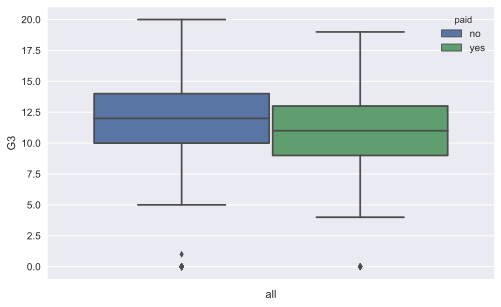

In [19]:
sns.boxplot(data=data_grade, x='all', y='G3', hue='paid')
plt.show()

* Наличия интернета

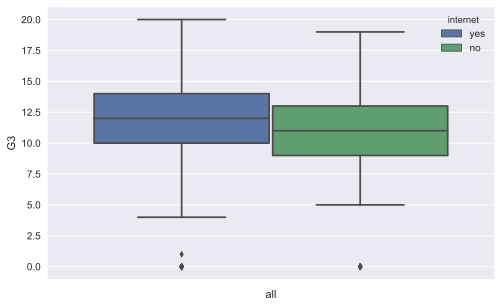

In [20]:
sns.boxplot(data=data_grade, x='all', y='G3', hue='internet')
plt.show()

* Наличия романтических отношений

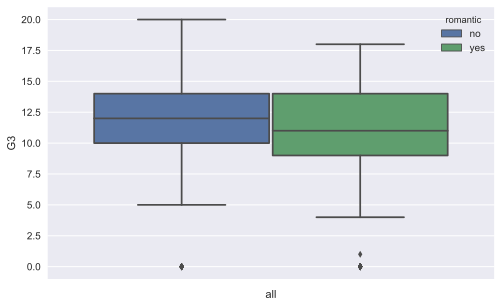

In [21]:
sns.boxplot(data=data_grade, x='all', y='G3', hue='romantic')
plt.show()

* Потребления алкоголя

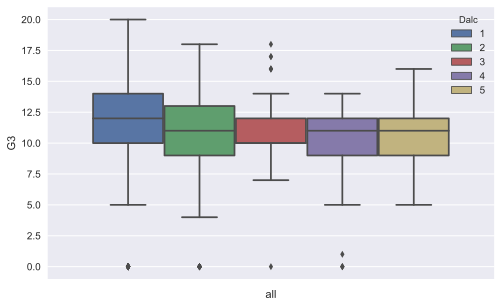

In [22]:
sns.boxplot(data=data_grade, x='all', y='G3', hue='Dalc')
plt.show()

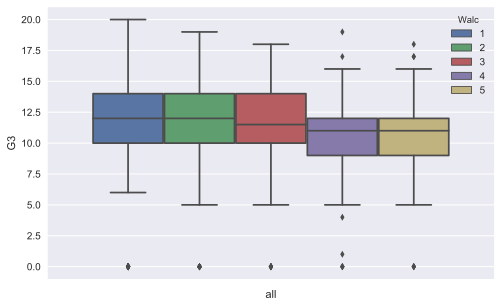

In [23]:
sns.boxplot(data=data_grade, x='all', y='G3', hue='Walc')
plt.show()

### Задание 4  
  
Оцените распределение признака `reason` (причина выбора школы) в зависимости от оценки по 4 балльной шкале:  

* Отлично: 18 <= `G3` <= 20
* Хорошо: 14 <= `G3` <= 17
* Удовлетворительно: 8 <= `G3` <= 13
* Неудовлетворительно: `G3` < 8

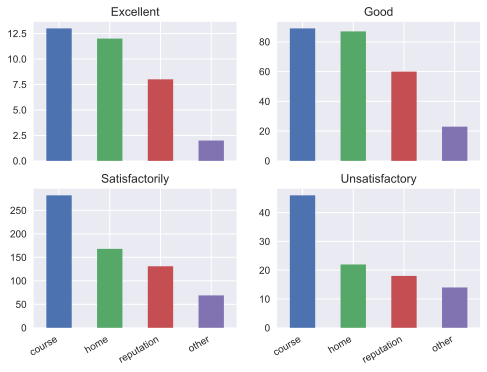

In [24]:
fig = plt.figure()
fig.set_figwidth(8)
fig.set_figheight(6.25)

g1 = fig.add_subplot(221)
data[(data.G3>=18) & (data.G3<=20)]['reason'].value_counts().plot.bar(ax=g1)
g1.set_title('Excellent')

g2 = fig.add_subplot(222)
data[(data.G3>=14) & (data.G3<=17)]['reason'].value_counts().plot.bar(ax=g2)
g2.set_title('Good')

g3 = fig.add_subplot(223)
data[(data.G3>=8) & (data.G3<=13)]['reason'].value_counts().plot.bar(ax=g3)
g3.set_title('Satisfactorily')

g4 = fig.add_subplot(224)
data[data.G3<8]['reason'].value_counts().plot.bar(ax=g4)
g4.set_title('Unsatisfactory')

fig.autofmt_xdate()
plt.show()

На удивление, получается так, что у людей, которые учатся хорошо и отлично, распределение причин course и home примерно одинаково.

### Задание 5  
  
Рассчитайте и провизуализируйте матрицу корреляций для числовых признаков (в том числе для бинарных). Дайте содержательный комментарий к матрице корреляций. 

#### Бинаризация данных
Теперь нам надо привести некоторые признаки в бинарные значения, чтобы было удобнее работать.

In [25]:
# school
data.school = pd.Series(np.where(data.school.values == 'GP', 1, 0),
          data.index)
#sex
data.sex = pd.Series(np.where(data.sex.values == 'M', 1, 0),
          data.index)
#address
data.address = pd.Series(np.where(data.address.values == 'U', 1, 0),
          data.index)
#famsize
data.famsize = pd.Series(np.where(data.famsize.values == 'GT3', 1, 0),
          data.index)
#pstatus
data.Pstatus = pd.Series(np.where(data.Pstatus.values == 'T', 1, 0),
          data.index)

#schoolsup-romantic
features = ['schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']
for i in features:
    data[i] = pd.Series(np.where(data[i].values == 'yes', 1, 0),
              data.index)
data.head()

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,100097,Por,1,0,16,1,1,0,3,4,services,other,course,father,1,1,0,0,0,0,0,1,1,1,0,3,2,1,1,4,5,12,15,13,14
1,101021,Por,1,0,17,1,1,1,3,2,other,other,course,mother,1,2,0,0,0,0,1,0,1,1,0,5,3,4,1,3,3,2,17,18,17
2,102965,Por,1,1,16,1,0,1,1,2,health,services,course,mother,2,1,2,0,0,0,0,0,1,1,0,4,4,5,3,5,5,0,9,8,10
3,102989,Por,0,1,17,1,1,1,2,3,other,services,home,father,2,2,0,0,0,0,1,1,1,1,0,4,4,3,1,1,3,4,14,15,16
4,103131,Por,1,0,16,1,1,1,1,1,at_home,other,home,mother,2,1,0,0,1,0,0,1,1,0,0,4,3,2,1,4,5,2,12,13,13


#### Изменения в итоге:
1. school: 1 - GP, 0 - MS
2. sex: 1 - Male, 0 - Female
3. address: 1 - U, 0 - R
4. famsize: 1 - GT3, 0 - LE3
5. Pstatus: 1 - T, 0 - A
6. schoolsup,famsup,paid,activities,nursery,higher,internet,romantic: 1 - yes, 0 - no

P.S. Здесь, конечно же, можно было использовать LabelEncoder, но такое решение пришло в голову раньше и, кроме того, работает оно очень быстро.

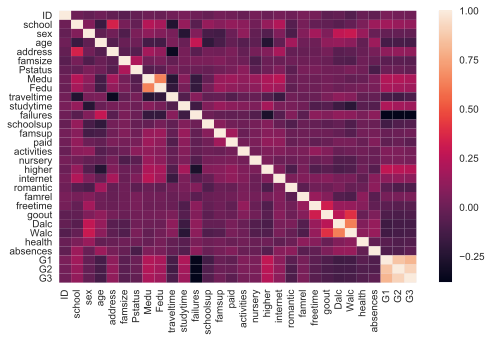

In [26]:
sns.heatmap(data.corr(),yticklabels=True)
plt.show()

In [27]:
data.corr()

,ID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
ID,1.000000,0.004535,-0.025566,0.008300,-0.028706,-0.061288,-0.024533,0.004511,-0.010280,0.017826,0.040581,0.010550,-0.020053,0.026893,0.016439,-0.012733,0.028902,-0.001419,0.028101,0.011195,0.038613,0.031543,-0.043845,-0.027197,-0.077028,-0.011587,-0.040859,0.044615,0.022835,0.015469
school,0.004535,1.000000,0.074955,-0.169938,0.341657,0.034882,-0.024030,0.235114,0.187611,-0.258834,0.133255,-0.066856,0.130498,0.088460,0.130125,0.097932,0.019349,0.131382,0.222993,-0.074506,0.036359,-0.026008,-0.037000,-0.066006,-0.026539,0.053214,0.155146,0.169123,0.144858,0.127114
sex,-0.025566,0.074955,1.000000,-0.038832,0.011556,-0.094361,0.051337,0.109387,0.070786,0.042508,-0.239972,0.065543,-0.119411,-0.137696,-0.002179,0.116368,-0.030492,-0.078775,0.062671,-0.108944,0.074725,0.181603,0.062530,0.275928,0.302623,0.141113,-0.013076,-0.025122,-0.025024,-0.031472
age,0.008300,-0.169938,-0.038832,1.000000,-0.071257,-0.013290,0.006887,-0.130196,-0.138521,0.049216,-0.007870,0.282364,-0.202824,-0.116904,-0.027917,-0.073648,-0.046846,-0.244601,-0.033229,0.173800,0.007162,0.002645,0.118510,0.133453,0.098291,-0.029129,0.153196,-0.124121,-0.119475,-0.125282
address,-0.028706,0.341657,0.011556,-0.071257,1.000000,-0.054484,-0.074097,0.179720,0.124303,-0.343803,0.037480,-0.061160,0.023583,0.011975,0.053024,-0.022095,0.031946,0.074716,0.194790,-0.021209,-0.016801,-0.009744,0.030790,-0.064030,-0.043391,-0.010895,0.036696,0.113113,0.127793,0.117696
famsize,-0.061288,0.034882,-0.094361,-0.013290,-0.054484,1.000000,0.207302,0.025556,0.047290,-0.031550,0.035109,0.044589,0.045552,0.067340,0.028290,0.009434,-0.101279,-0.000650,-0.008315,0.007656,0.005328,0.007249,-0.005889,-0.075646,-0.090019,0.009147,-0.018284,-0.057610,-0.057469,-0.061209
Pstatus,-0.024533,-0.024030,0.051337,0.006887,-0.074097,0.207302,1.000000,-0.077133,-0.049156,0.033883,0.005049,-0.004615,-0.020789,0.013370,0.040341,0.100576,-0.054016,0.007339,0.065260,-0.050021,0.042448,0.038714,0.020498,0.015777,0.047575,0.016213,-0.113955,-0.000155,-0.010219,-0.030693
Medu,0.004511,0.235114,0.109387,-0.130196,0.179720,0.025556,-0.077133,1.000000,0.642063,-0.238181,0.090616,-0.187769,-0.023618,0.143063,0.161349,0.116924,0.149287,0.206551,0.249728,-0.008685,0.015004,0.001054,0.025614,0.001515,-0.029331,-0.013254,0.059708,0.226101,0.224662,0.201472
Fedu,-0.010280,0.187611,0.070786,-0.138521,0.124303,0.047290,-0.049156,0.642063,1.000000,-0.196328,0.033458,-0.191390,0.032450,0.153342,0.118897,0.093800,0.104681,0.191956,0.170012,-0.039906,0.013066,0.002142,0.030075,-0.000165,0.019524,0.034288,0.040829,0.195898,0.182634,0.159796
traveltime,0.017826,-0.258834,0.042508,0.049216,-0.343803,-0.031550,0.033883,-0.238181,-0.196328,1.000000,-0.081328,0.087177,-0.033940,-0.026117,-0.083679,-0.025834,-0.018641,-0.081857,-0.169485,0.013603,-0.012578,-0.007403,0.049740,0.109423,0.084292,-0.029002,-0.022669,-0.121053,-0.140163,-0.102627


Из матрицы корреляций можно понять следующее:
1. Возраст связан с завалами и желанием получать высшее образование. Чем старше человек, тем больше завалов и меньше желание поступать.
2. Школа связана с местом проживания студента и временем, необходимым, чтобы добраться до школы.
3. Профессии родителей связаны со многими признаками: например, со временем, необходимым, чтобы добраться до школы (возможно, дом выбирают поближе к работе). Еще есть связь между профессиями и завалами и итоговыми оценками студента: обратная к провалам и прямая к оценке. Кроме того, есть зависимость между видами работ родителей (вероятнее всего, они знакомятся либо в универе, либо на работе).
4. Можно заметить, что потребление алкоголя негативно влияет на учебу студента. 
5. Пол студента влияет на потребление алкоголя: пьют больше парни.
6. Есть связь между свободным временем после занятий и времени, которое проводят с друзьями.
7. А количество времени, проводимое с друзьями, связано с потреблением алкоголя.
8. Количество завалов влияет на желание получать высшее образование и на оценки.
9. Желание поступать в универ коррелирует с оценками.
10. Ну и самое очевидное – полугодовые оценки связаны с итоговыми. 

### Задание *
  
Дополнительное исследование данных и выводы положительно скажутся на оценке. 

На данных хотелось бы определить связь романтических отношений с другими признаками.

In [32]:
data_grade[data_grade.romantic == 'no'].describe(include='all')

,G3,sex,traveltime,schoolsup,famsup,paid,internet,romantic,Dalc,Walc,freetime,all,support
count,673.000000,673,673.000000,673,673,673,673,673,673.000000,673.000000,673.000000,673,673
unique,NaN,2,NaN,2,2,2,2,1,NaN,NaN,NaN,1,2
top,NaN,F,NaN,no,yes,no,yes,no,NaN,NaN,NaN,,yes
freq,NaN,354,NaN,582,415,527,523,673,NaN,NaN,NaN,673,441
mean,11.624071,NaN,1.515602,NaN,NaN,NaN,NaN,NaN,1.463596,2.300149,3.191679,NaN,NaN
std,3.659196,NaN,0.715565,NaN,NaN,NaN,NaN,NaN,0.842825,1.283695,1.038166,NaN,NaN
min,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN,NaN
25%,10.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,3.000000,NaN,NaN
50%,12.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,2.000000,3.000000,NaN,NaN
75%,14.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,2.000000,3.000000,4.000000,NaN,NaN


In [33]:
data_grade[data_grade.romantic == 'yes'].describe(include='all')

,G3,sex,traveltime,schoolsup,famsup,paid,internet,romantic,Dalc,Walc,freetime,all,support
count,371.000000,371,371.000000,371,371,371,371,371,371.000000,371.000000,371.000000,371,371
unique,NaN,2,NaN,2,2,2,2,1,NaN,NaN,NaN,1,2
top,NaN,F,NaN,no,yes,no,yes,yes,NaN,NaN,NaN,,yes
freq,NaN,237,NaN,343,225,297,304,371,NaN,NaN,NaN,371,231
mean,10.830189,NaN,1.536388,NaN,NaN,NaN,NaN,NaN,1.549865,2.256065,3.218329,NaN,NaN
std,4.168836,NaN,0.760972,NaN,NaN,NaN,NaN,NaN,1.023808,1.288907,1.020487,NaN,NaN
min,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN,NaN
25%,9.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,3.000000,NaN,NaN
50%,11.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,2.000000,3.000000,NaN,NaN
75%,14.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,2.000000,3.000000,4.000000,NaN,NaN


Было видно еще на таблице, что зависимость отношений и других признаков слишком маленькая, чтобы сделать какие-либо предположения.

## Часть 2. Машинное обучение

In [34]:
from sklearn import metrics
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

Создадим новый датасет, в котором будем менять признаки для моделей. 
Дропнем G2, которое нельзя использовать, и ID

In [35]:
ml_data = data.drop(['ID','G2'],axis=1)

ml_data.head()

,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G3
0,Por,1,0,16,1,1,0,3,4,services,other,course,father,1,1,0,0,0,0,0,1,1,1,0,3,2,1,1,4,5,12,15,14
1,Por,1,0,17,1,1,1,3,2,other,other,course,mother,1,2,0,0,0,0,1,0,1,1,0,5,3,4,1,3,3,2,17,17
2,Por,1,1,16,1,0,1,1,2,health,services,course,mother,2,1,2,0,0,0,0,0,1,1,0,4,4,5,3,5,5,0,9,10
3,Por,0,1,17,1,1,1,2,3,other,services,home,father,2,2,0,0,0,0,1,1,1,1,0,4,4,3,1,1,3,4,14,16
4,Por,1,0,16,1,1,1,1,1,at_home,other,home,mother,2,1,0,0,1,0,0,1,1,0,0,4,3,2,1,4,5,2,12,13


Переведем признаки из символьных в числовые:

In [36]:
# school
lb_enc = preprocessing.LabelEncoder().fit(ml_data.school)
ml_data.school = lb_enc.transform(ml_data.school)
# Mjob
lb_enc.fit(ml_data.Mjob)
ml_data.Mjob = lb_enc.transform(ml_data.Mjob)
# Fjob
lb_enc.fit(ml_data.Fjob)
ml_data.Fjob = lb_enc.transform(ml_data.Fjob)
# reason
lb_enc.fit(ml_data.reason)
ml_data.reason = lb_enc.transform(ml_data.reason)
# guardian
lb_enc.fit(ml_data.guardian)
ml_data.guardian = lb_enc.transform(ml_data.guardian)

ml_data.head()

,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G3
0,Por,1,0,16,1,1,0,3,4,3,2,0,0,1,1,0,0,0,0,0,1,1,1,0,3,2,1,1,4,5,12,15,14
1,Por,1,0,17,1,1,1,3,2,2,2,0,1,1,2,0,0,0,0,1,0,1,1,0,5,3,4,1,3,3,2,17,17
2,Por,1,1,16,1,0,1,1,2,1,3,0,1,2,1,2,0,0,0,0,0,1,1,0,4,4,5,3,5,5,0,9,10
3,Por,0,1,17,1,1,1,2,3,2,3,1,0,2,2,0,0,0,0,1,1,1,1,0,4,4,3,1,1,3,4,14,16
4,Por,1,0,16,1,1,1,1,1,0,2,1,1,2,1,0,0,1,0,0,1,1,0,0,4,3,2,1,4,5,2,12,13


**Создадим второй датасет, в котором категорические признаки разделим на бинарные**

In [37]:
# 6-13 = Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime
# 23-28 = famrel,freetime,goout,Dalc,Walc,health
oh_enc = preprocessing.OneHotEncoder(sparse=False, categorical_features=[6,7,8,9,10,11,12,13,23,24,25,26,27,28])
ml_data_category=ml_data.drop('Subject',axis=1)

oh_enc.fit(ml_data_category)

OneHotEncoder(categorical_features=[6, 7, 8, 9, 10, 11, 12, 13, 23, 24, 25, 26, 27, 28],
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values='auto', sparse=False)

In [38]:
col = []
for i in range(81):
    col.append(str(i))

col.append('G1')
col.append('G3')
ml_data_category = pd.DataFrame(oh_enc.transform(X = ml_data_category), 
                                 columns=col)

**Разделим на две выборки по каждому предмету**

In [39]:
ml_data_Math = ml_data[ml_data.Subject == 'Math'].drop('Subject',axis=1)
ml_data_Por = ml_data[ml_data.Subject == 'Por'].drop('Subject',axis=1)
ml_data = ml_data.drop('Subject',axis=1)

**Стандартизация данных для метрических методов**

In [40]:
ml_data_category_scale = ml_data_category.drop('G1',axis=1)
ml_data_category_scale.iloc[:,:-1] = preprocessing.scale(ml_data_category_scale.iloc[:,:-1])

ml_data_category_scale.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,...,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,G3
0,-0.09325,-0.489801,-0.618693,1.840259,-0.643921,-0.09325,-0.569976,-0.670820,-0.533041,1.913299,-0.47774,-0.291957,-0.786514,1.835266,-0.377137,-0.25127,-0.202182,0.887508,-0.623136,-0.257671,...,-0.509263,-0.447214,1.281810,0.593575,-0.875498,-0.585820,0.612776,0.643921,-2.761901,-0.403106,-0.358676,-1.258634,-0.516711,-0.988571,0.500299,0.305276,0.512244,-0.742471,1.218799,14.0
1,-0.09325,-0.489801,-0.618693,1.840259,-0.643921,-0.09325,-0.569976,1.490712,-0.533041,-0.522657,-0.47774,-0.291957,1.271433,-0.544880,-0.377137,-0.25127,-0.202182,0.887508,-0.623136,-0.257671,...,1.963623,-0.447214,-0.780147,0.593575,-0.875498,0.221035,0.612776,0.643921,0.362069,-0.403106,-0.358676,-1.258634,-0.516711,1.011561,-1.998803,0.305276,0.512244,-0.742471,-0.392275,17.0
2,-0.09325,2.041646,-0.618693,-0.543402,-0.643921,-0.09325,-0.569976,1.490712,-0.533041,-0.522657,-0.47774,3.425158,-0.786514,-0.544880,-0.377137,-0.25127,-0.202182,-1.126750,1.604787,-0.257671,...,-0.509263,-0.447214,1.281810,0.593575,1.142207,-0.585820,0.612776,-1.552986,0.362069,2.646477,-0.358676,-1.258634,-0.516711,-0.988571,-1.998803,0.305276,0.512244,-0.742471,-0.714489,10.0
3,-0.09325,-0.489801,1.616310,-0.543402,-0.643921,-0.09325,-0.569976,-0.670820,1.876028,-0.522657,-0.47774,-0.291957,1.271433,-0.544880,-0.377137,-0.25127,-0.202182,-1.126750,1.604787,-0.257671,...,1.963623,-0.447214,-0.780147,-1.684706,1.142207,0.221035,0.612776,0.643921,0.362069,-0.403106,-0.358676,-1.258634,-0.516711,1.011561,0.500299,0.305276,0.512244,-0.742471,-0.070060,16.0
4,-0.09325,2.041646,-0.618693,-0.543402,-0.643921,-0.09325,1.754459,-0.670820,-0.533041,-0.522657,2.09319,-0.291957,-0.786514,-0.544880,-0.377137,-0.25127,-0.202182,0.887508,-0.623136,-0.257671,...,-0.509263,-0.447214,1.281810,0.593575,-0.875498,-0.585820,0.612776,0.643921,0.362069,-0.403106,-0.358676,0.794512,-0.516711,-0.988571,0.500299,0.305276,-1.952194,-0.742471,-0.392275,13.0


**Разделим выборки на обучающие и тестовые**

In [41]:
# С признаком G1
(trainData_with_G1, 
 testData_with_G1, 
 trainDependentVariables_with_G1, 
 testDependentVariables_with_G1) = train_test_split(ml_data.drop('G3', axis=1),
                                            ml_data['G3'],
                                            test_size=0.3, 
                                            random_state=15)

In [42]:
# Без признака G1
(trainData, 
 testData, 
 trainDependentVariables, 
 testDependentVariables) = train_test_split(ml_data.drop(['G1','G3'], axis=1),
                                            ml_data['G3'],
                                            test_size=0.3, 
                                            random_state=15)

In [43]:
# Без G1 и с разбивкой по предметам
(trainData_Math, 
 testData_Math, 
 trainDependentVariables_Math, 
 testDependentVariables_Math) = train_test_split(ml_data_Math.drop(['G1','G3'], axis=1),
                                            ml_data_Math['G3'],
                                            test_size=0.3, 
                                            random_state=15)
(trainData_Por, 
 testData_Por, 
 trainDependentVariables_Por, 
 testDependentVariables_Por) = train_test_split(ml_data_Por.drop(['G1','G3'], axis=1),
                                            ml_data_Por['G3'],
                                            test_size=0.3, 
                                            random_state=15)

In [44]:
# Без G1 и с бинаризацией категорических признаков
(trainData_category, 
 testData_category, 
 trainDependentVariables_category, 
 testDependentVariables_category) = train_test_split(ml_data_category.drop(['G1','G3'], axis=1),
                                            ml_data_category['G3'],
                                            test_size=0.3, 
                                            random_state=15)

In [45]:
# Стандартизованные данные без G1 и с бинаризацией категорических признаков
(trainData_category_scale, 
 testData_category_scale, 
 trainDependentVariables_category_scale, 
 testDependentVariables_category_scale) = train_test_split(ml_data_category_scale.drop('G3', axis=1),
                                            ml_data_category_scale['G3'],
                                            test_size=0.3, 
                                            random_state=15)

In [46]:
def regression_metrics(predictedDependentVariables, testDependentVariables):
    mse = metrics.mean_squared_error(y_pred=predictedDependentVariables, 
                                 y_true=testDependentVariables)

    rmse = np.sqrt(mse)

    mae = metrics.mean_absolute_error(y_pred=predictedDependentVariables, 
                                  y_true=testDependentVariables)

    medae = metrics.median_absolute_error(y_pred=predictedDependentVariables, 
                                      y_true=testDependentVariables)

    R2 = metrics.r2_score(y_pred=predictedDependentVariables, 
                      y_true=testDependentVariables)
    
    return mse,rmse,mae,medae,R2

In [47]:
def plot_comparison(testDepVar, predDepVar, end_border=100, xlabel='observations', ylabel='G3'):
    plt.plot(testDepVar[1:end_border].values, 'b-', label='true')
    plt.plot(predDepVar[1:end_border], 'r-', label='pred')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.legend(loc='best')

    plt.show()

### Задание 1.   Регрессия

In [48]:
from sklearn import linear_model
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

Решите задачу регрессии: постройте модель, предсказывающую итоговую оценку, которую получит студент по предмету (`G3`).  
При решении задачи нельзя использовать признак `G2`.  
  
При решении задачи используйте различные методы, которые рассматривались на занятиях: линейная регрессия, гребневая регрессия и Лассо-регрессия; KNN и  Radius NN. На кросс-валидации подберите оптимальные значения гиперпараметров алгоритмов.
  
Задачу необходимо решить в двух вариантах: с использованием признака `G1`  и без него. Сравните качество решений в двух случаях.  
  
В регрессионных моделях попробуйте дать интерпретацию весам признаков. 

### Линейная регрессия

Для начала проверим следующие качества решений:
1. С оценкой G1 и без.
2. С использованием OneHotEncoder и без.
3. С разделением по предметам и без.

**С оценкой G1**

In [49]:
regressionModel = linear_model.LinearRegression()

regressionModel.fit(trainData_with_G1, trainDependentVariables_with_G1)
predictedDependentVariables_with_G1 = regressionModel.predict(testData_with_G1)

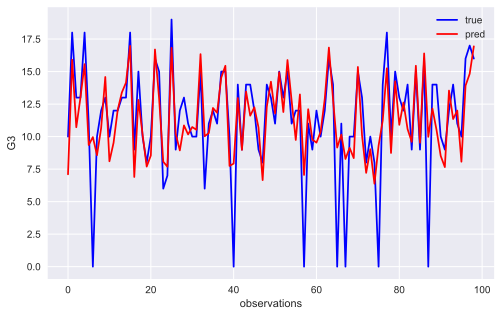

In [50]:
plot_comparison(testDependentVariables_with_G1,predictedDependentVariables_with_G1)

In [51]:
mse,rmse,mae,medae,R2 = \
regression_metrics(predictedDependentVariables_with_G1, 
                   testDependentVariables_with_G1)

print("MSE:   {}\nRMSE:  {}\nR2:    {}\nMAE:   {}\nMedAE: {}".format(mse, rmse, R2, mae, medae))

MSE:   5.541584187460368
RMSE:  2.354056963512219
R2:    0.6309114404848857
MAE:   1.5949493462264814
MedAE: 1.1010936206328514


In [52]:
pd.Series(sorted(regressionModel.coef_, 
                 key=abs, 
                 reverse=True), 
          index=trainData_with_G1.columns)

school        1.014518
sex          -0.486243
age           0.433347
address      -0.432964
famsize      -0.431447
Pstatus      -0.371676
Medu         -0.325668
Fedu          0.283094
Mjob          0.276753
Fjob          0.259220
reason       -0.240648
guardian     -0.198683
traveltime    0.179625
studytime    -0.179405
failures      0.178406
schoolsup     0.175191
famsup        0.157440
paid         -0.152255
activities   -0.104039
nursery      -0.097771
higher       -0.092999
internet     -0.089602
romantic     -0.082287
famrel        0.074671
freetime     -0.071390
goout        -0.051127
Dalc          0.020987
Walc         -0.016725
health        0.016365
absences     -0.008098
G1            0.004570
dtype: float64

**Без G1**

In [53]:
regressionModel = linear_model.LinearRegression()

regressionModel.fit(trainData, trainDependentVariables)
predictedDependentVariables = regressionModel.predict(testData)

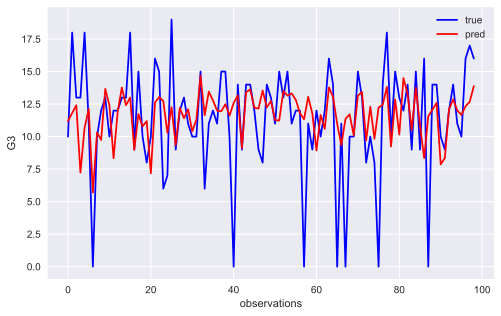

In [54]:
plot_comparison(testDependentVariables,predictedDependentVariables)

In [55]:
mse,rmse,mae,medae,R2 = \
regression_metrics(predictedDependentVariables, 
                   testDependentVariables)

print("MSE:   {}\nRMSE:  {}\nR2:    {}\nMAE:   {}\nMedAE: {}".format(mse, rmse, R2, mae, medae))

MSE:   12.136261286268963
RMSE:  3.4837137204812
R2:    0.19168327241440186
MAE:   2.5031573669733684
MedAE: 1.9095008082442408


Как можно заметить, качество без G1 ухудшилось почти в два раза. Признак G1 играет большую роль, это было видно даже из матрицы корреляций. В дальнейшем мы не будем использовать признак G1, чтобы посмотреть как разные регрессии будут справляться без такой подсказки.

**Без G1 и с бинаризацией категорических признаков**

In [56]:
regressionModel = linear_model.LinearRegression()

regressionModel.fit(trainData_category, trainDependentVariables_category)
predictedDependentVariables_category = regressionModel.predict(testData_category)

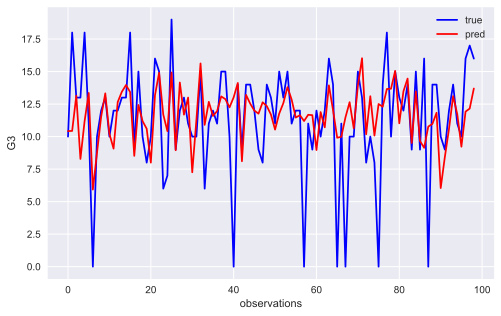

In [57]:
plot_comparison(testDependentVariables_category,predictedDependentVariables_category)

In [58]:
mse,rmse,mae,medae,R2 = \
regression_metrics(predictedDependentVariables_category, 
                   testDependentVariables_category)

print("MSE:   {}\nRMSE:  {}\nR2:    {}\nMAE:   {}\nMedAE: {}".format(mse, rmse, R2, mae, medae))

MSE:   11.818654974115788
RMSE:  3.437827071583995
R2:    0.21283694477235016
MAE:   2.4921305468127986
MedAE: 1.839263916015625


Бинаризация категорических признаков помогла улучшить качество. В дальнейшем будем пользоваться этими данными.

**Без G1 и с разделением на предметы**

_Por_

In [59]:
regressionModel = linear_model.LinearRegression()

regressionModel.fit(trainData_Por, trainDependentVariables_Por)
predictedDependentVariables_Por = regressionModel.predict(testData_Por)

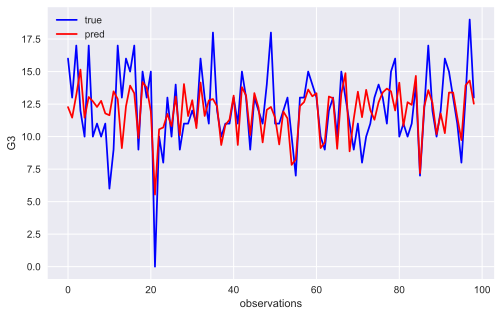

In [60]:
plot_comparison(testDependentVariables_Por,predictedDependentVariables_Por)

In [61]:
mse_Por,rmse_Por,mae_Por,medae_Por,R2_Por = \
regression_metrics(predictedDependentVariables_Por, 
                   testDependentVariables_Por)

print("MSE:   {}\nRMSE:  {}\nR2:    {}\nMAE:   {}\nMedAE: {}".format(mse_Por, rmse_Por, R2_Por, mae_Por, medae_Por))

MSE:   5.767949387739117
RMSE:  2.4016555514351174
R2:    0.36371099325556444
MAE:   1.8344124889781752
MedAE: 1.4101725290654379


_Math_

In [62]:
regressionModel = linear_model.LinearRegression()

regressionModel.fit(trainData_Math, trainDependentVariables_Math)
predictedDependentVariables_Math = regressionModel.predict(testData_Math)

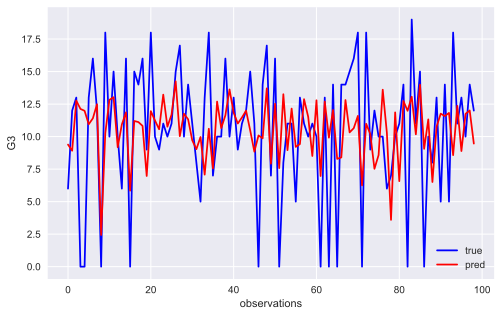

In [63]:
plot_comparison(testDependentVariables_Math,predictedDependentVariables_Math)

In [64]:
mse_Math,rmse_Math,mae_Math,medae_Math,R2_Math = \
regression_metrics(predictedDependentVariables_Math, 
                   testDependentVariables_Math)

print("MSE:   {}\nRMSE:  {}\nR2:    {}\nMAE:   {}\nMedAE: {}".format(mse_Math, rmse_Math, R2_Math, mae_Math, medae_Math))

MSE:   19.23310330549117
RMSE:  4.385556213924429
R2:    0.17663781883049534
MAE:   3.4086437819713455
MedAE: 2.6682242905109668


А теперь выведем среднее качество:

In [65]:
print("MSE:   {}\nRMSE:  {}\nR2:    {}\nMAE:   {}\nMedAE: {}".format((mse_Math+mse_Por)/2, (rmse_Math+rmse_Por)/2, (R2_Math+R2_Por)/2, (mae_Math+mae_Por)/2, (medae_Math+medae_Por)/2))

MSE:   12.500526346615143
RMSE:  3.393605882679773
R2:    0.2701744060430299
MAE:   2.6215281354747604
MedAE: 2.0391984097882023


Значения всех метрик немного ухудшилось. В дальнейшем разделением на предметы пользоваться не будем.

### Гребневая регрессия

In [66]:
from sklearn.metrics import mean_squared_error

In [67]:
ridgeModel = linear_model.RidgeCV(alphas=np.array(range(0, 1000, 1))/10, 
                                  cv=5,
                                 scoring='neg_mean_squared_error')

In [68]:
ridgeModel.fit(trainData_category, trainDependentVariables_category)

predictedDependentVariables_category = ridgeModel.predict(testData_category)

ridgeModel.alpha_

81.299999999999997

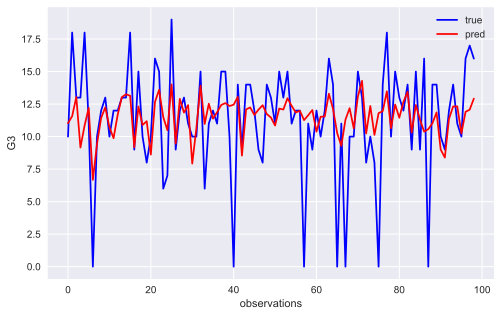

In [69]:
plot_comparison(testDependentVariables_category,predictedDependentVariables_category)

In [70]:
mse,rmse,mae,medae,R2 = \
regression_metrics(predictedDependentVariables_category, 
                   testDependentVariables_category)

print("MSE:   {}\nRMSE:  {}\nR2:    {}\nMAE:   {}\nMedAE: {}".format(mse, rmse, R2, mae, medae))

MSE:   11.690059867553718
RMSE:  3.41907295440646
R2:    0.22140182099476458
MAE:   2.4567674122386043
MedAE: 1.7164728140913983


### Лассо-регрессия

In [71]:
lassoModel = linear_model.LassoCV(alphas=np.array(range(0, 10, 1))/10, 
                                  cv=5)

In [72]:
lassoModel.fit(trainData_category, trainDependentVariables_category)

predictedDependentVariables_category = lassoModel.predict(testData_category)

0.1


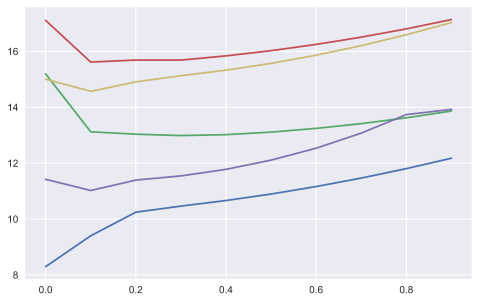

In [73]:
print(lassoModel.alpha_)

plt.plot(lassoModel.alphas_, lassoModel.mse_path_)
plt.show()

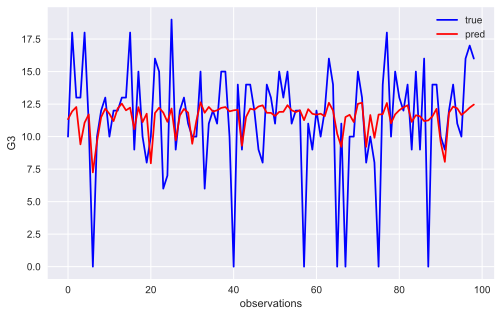

In [74]:
plot_comparison(testDependentVariables_category,predictedDependentVariables_category)

In [75]:
mse,rmse,mae,medae,R2 = \
regression_metrics(predictedDependentVariables_category, 
                   testDependentVariables_category)

print("MSE:   {}\nRMSE:  {}\nR2:    {}\nMAE:   {}\nMedAE: {}".format(mse, rmse, R2, mae, medae))

MSE:   12.245717649445188
RMSE:  3.4993881821605886
R2:    0.18439310230277717
MAE:   2.521288653009787
MedAE: 1.8097196261060047


### KNN

In [76]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [82]:
kf.get_n_splits(trainData_category_scale)

k_optimal = 1
mae_optimal = 0
i = 1

knrModel = KNeighborsRegressor(n_neighbors=i)

mae_total = 0
for train_index, test_index in kf.split(trainData_category_scale):
    knrModel.fit(trainData_category_scale.iloc[train_index], trainDependentVariables_category_scale.iloc[train_index])
        
    predictedDependentVariables_category_scale = knrModel.predict(trainData_category_scale.iloc[test_index])
    mae = metrics.mean_absolute_error(y_pred=predictedDependentVariables_category_scale, 
                                  y_true=trainDependentVariables_category_scale.iloc[test_index])
    mae_total += mae

mae_optimal = mae_total/5
#print(str(i)+" MAE: "+ str(mae_optimal))

for i in range(2,51,1):
    # create model with given amount of neighbours
    knrModel = KNeighborsRegressor(n_neighbors=i)
    
    # for split data fit model and count mae
    mae_total = 0
    for train_index, test_index in kf.split(trainData_category_scale):
        knrModel.fit(trainData_category_scale.iloc[train_index], trainDependentVariables_category_scale.iloc[train_index])
        
        predictedDependentVariables_category_scale = knrModel.predict(trainData_category_scale.iloc[test_index])
        mae = metrics.mean_absolute_error(y_pred=predictedDependentVariables_category_scale, 
                                  y_true=trainDependentVariables_category_scale.iloc[test_index])
        
        mae_total += mae
        
    mae_total = mae_total/5
    #print(str(i)+" MAE: "+ str(mae_total/5))
    
    if(mae_total<mae_optimal):
        mae_optimal = mae_total
        k_optimal = i


print("optimal:", k_optimal,mae_optimal) #24 MAE: 0.520319634703

optimal: 24 2.60159817352


In [78]:
knrModel = KNeighborsRegressor(n_neighbors=k_optimal)
knrModel.fit(trainData_category_scale, trainDependentVariables_category_scale)

predictedDependentVariables_category_scale = knrModel.predict(testData_category_scale)

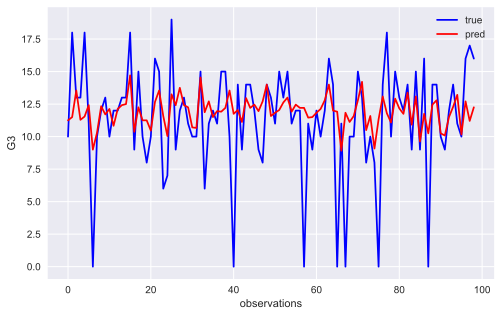

In [79]:
plot_comparison(testDependentVariables_category_scale,predictedDependentVariables_category_scale)

In [80]:
mse,rmse,mae,medae,R2 = \
regression_metrics(predictedDependentVariables_category_scale, 
                   testDependentVariables_category_scale)

print("MSE:   {}\nRMSE:  {}\nR2:    {}\nMAE:   {}\nMedAE: {}".format(mse, rmse, R2, mae, medae))

MSE:   12.924545514861997
RMSE:  3.595072393549537
R2:    0.13918083257450076
MAE:   2.509156050955414
MedAE: 1.729166666666667


### Radius NN

In [83]:
from scipy.spatial.distance import pdist

radiuses = pdist(trainData_category_scale)

radius_end = radiuses.max()
radius_start = radiuses.min()

print("Max:",radius_end)
print("Min:",radius_start)

Max: 22.6808882034
Min: 0.0


In [84]:
ixs = np.array(range(int(radius_start*10), int(radius_end*10), 1))/10
ixs[200:]

array([ 20. ,  20.1,  20.2,  20.3,  20.4,  20.5,  20.6,  20.7,  20.8,
        20.9,  21. ,  21.1,  21.2,  21.3,  21.4,  21.5,  21.6,  21.7,
        21.8,  21.9,  22. ,  22.1,  22.2,  22.3,  22.4,  22.5])

In [85]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [86]:
kf.get_n_splits(trainData_category_scale)

radius_optimal = 1
mae_optimal = 0

for i in ixs:
    rnrModel = RadiusNeighborsRegressor(radius=i)
    
    # for split data fit model and count mae
    mae_total = 0
    size_predicted = 0
    size_not_nan = 0
    for train_index, test_index in kf.split(trainData_category_scale):
        rnrModel.fit(trainData_category_scale.iloc[train_index], trainDependentVariables_category_scale.iloc[train_index])
    
        predictedDependentVariables_category_scale = rnrModel.predict(trainData_category_scale.iloc[test_index])
        size_predicted += len(predictedDependentVariables_category_scale)

        is_nan = np.isnan(predictedDependentVariables_category_scale)
        predictedDependentVariables_category_scale = predictedDependentVariables_category_scale[~is_nan]
        size_not_nan += len(predictedDependentVariables_category_scale)
        
        mae = metrics.mean_absolute_error(y_pred=predictedDependentVariables_category_scale, 
                                          y_true=trainDependentVariables_category_scale.iloc[test_index][~is_nan])
        
        mae_total += mae
    
    #print("Predicted:",size_not_nan/size_predicted)
    
    if ((size_not_nan/size_predicted) < 0.99):
        #print("Predicted less 0.99")
        continue
    
    mae_total = mae_total/5
    
    if ((mae_total<mae_optimal)|(mae_optimal==0)):
        radius_optimal = i
        mae_optimal = mae_total
        
    
    #print(str(i)+" MAE: "+ str(mae_total/5))    
       

print("optimal:", radius_optimal,mae_optimal)

optimal: 12.6 2.74139003246


In [87]:
rnrModel = RadiusNeighborsRegressor(radius=radius_optimal)
rnrModel.fit(trainData_category_scale, trainDependentVariables_category_scale)

predictedDependentVariables_category_scale = rnrModel.predict(testData_category_scale)

In [88]:
is_nan = np.isnan(predictedDependentVariables_category_scale)

predictedDependentVariables_category_scale = predictedDependentVariables_category_scale[~is_nan]

len(predictedDependentVariables_category_scale)

312

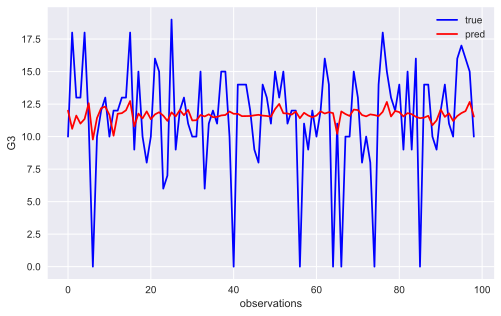

In [89]:
plot_comparison(testDependentVariables_category_scale[~is_nan],predictedDependentVariables_category_scale)

In [91]:
mse,rmse,mae,medae,R2 = \
regression_metrics(predictedDependentVariables_category_scale, 
                   testDependentVariables_category_scale[~is_nan])

print("MSE:   {}\nRMSE:  {}\nR2:    {}\nMAE:   {}\nMedAE: {}".format(mse, rmse, R2, mae, medae))

MSE:   14.388386908240218
RMSE:  3.7932027243795208
R2:    0.04607314644521632
MAE:   2.7298603085200046
MedAE: 2.0078828828828827


 #### Random Forest

In [92]:
param_grid = {"n_estimators": [10,20,30],
              "max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False]}

randFR = RandomForestRegressor(random_state=42)
grid_forest = GridSearchCV(randFR, param_grid, cv=5, verbose=1)

grid_forest.fit(trainData_category_scale,
                trainDependentVariables_category_scale)

predictedDependentVariables_category_scale = grid_forest.predict(testData_category_scale)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=1)]: Done 1620 out of 1620 | elapsed:  3.5min finished


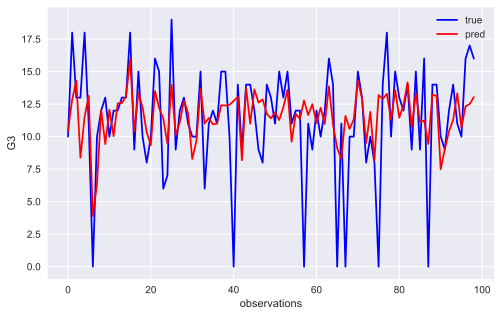

In [93]:
plot_comparison(testDependentVariables_category_scale,predictedDependentVariables_category_scale)

In [94]:
mse,rmse,mae,medae,R2 = \
regression_metrics(predictedDependentVariables_category_scale, 
                   testDependentVariables_category_scale)

print("MSE:   {}\nRMSE:  {}\nR2:    {}\nMAE:   {}\nMedAE: {}".format(mse, rmse, R2, mae, medae))

MSE:   11.501979741832935
RMSE:  3.3914568760096206
R2:    0.23392860400977078
MAE:   2.395566197337694
MedAE: 1.6415476190476177


**Итоги:**

Наилучший результат показали данные, содержащие G1, что неудивительно, ибо между итоговой оценкой и G1 большая корреляция.
А на данных, где было произведено разделение категорических данных на бинарные наилучший результат показал Random forest.

### Задание 2.  Бинарная классификация

In [95]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier

Решите задачу бинарной классификации: постройте модель, предсказывающую, сдаст студент предмет (`G3` >= 8) или не сдаст (`G3` < 8).  
При решении задачи нельзя использовать признаки `G1` и `G2`.  
  

При решении задачи рассмотрите различные модели: методы ближайших соседей, логистическую регрессию, деревья решений. На кросс-валидации подберите оптимальные значения гиперпараметров алгоритмов.  

In [96]:
ml_data_category_scale_binary = ml_data_category_scale.drop('G3',axis=1)
ml_data_category_scale_binary['passed'] = (data.G3 >= 8).astype('int64')
ml_data_category_scale_binary.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,...,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,passed
0,-0.09325,-0.489801,-0.618693,1.840259,-0.643921,-0.09325,-0.569976,-0.670820,-0.533041,1.913299,-0.47774,-0.291957,-0.786514,1.835266,-0.377137,-0.25127,-0.202182,0.887508,-0.623136,-0.257671,...,-0.509263,-0.447214,1.281810,0.593575,-0.875498,-0.585820,0.612776,0.643921,-2.761901,-0.403106,-0.358676,-1.258634,-0.516711,-0.988571,0.500299,0.305276,0.512244,-0.742471,1.218799,1
1,-0.09325,-0.489801,-0.618693,1.840259,-0.643921,-0.09325,-0.569976,1.490712,-0.533041,-0.522657,-0.47774,-0.291957,1.271433,-0.544880,-0.377137,-0.25127,-0.202182,0.887508,-0.623136,-0.257671,...,1.963623,-0.447214,-0.780147,0.593575,-0.875498,0.221035,0.612776,0.643921,0.362069,-0.403106,-0.358676,-1.258634,-0.516711,1.011561,-1.998803,0.305276,0.512244,-0.742471,-0.392275,1
2,-0.09325,2.041646,-0.618693,-0.543402,-0.643921,-0.09325,-0.569976,1.490712,-0.533041,-0.522657,-0.47774,3.425158,-0.786514,-0.544880,-0.377137,-0.25127,-0.202182,-1.126750,1.604787,-0.257671,...,-0.509263,-0.447214,1.281810,0.593575,1.142207,-0.585820,0.612776,-1.552986,0.362069,2.646477,-0.358676,-1.258634,-0.516711,-0.988571,-1.998803,0.305276,0.512244,-0.742471,-0.714489,1
3,-0.09325,-0.489801,1.616310,-0.543402,-0.643921,-0.09325,-0.569976,-0.670820,1.876028,-0.522657,-0.47774,-0.291957,1.271433,-0.544880,-0.377137,-0.25127,-0.202182,-1.126750,1.604787,-0.257671,...,1.963623,-0.447214,-0.780147,-1.684706,1.142207,0.221035,0.612776,0.643921,0.362069,-0.403106,-0.358676,-1.258634,-0.516711,1.011561,0.500299,0.305276,0.512244,-0.742471,-0.070060,1
4,-0.09325,2.041646,-0.618693,-0.543402,-0.643921,-0.09325,1.754459,-0.670820,-0.533041,-0.522657,2.09319,-0.291957,-0.786514,-0.544880,-0.377137,-0.25127,-0.202182,0.887508,-0.623136,-0.257671,...,-0.509263,-0.447214,1.281810,0.593575,-0.875498,-0.585820,0.612776,0.643921,0.362069,-0.403106,-0.358676,0.794512,-0.516711,-0.988571,0.500299,0.305276,-1.952194,-0.742471,-0.392275,1


**Разделим данные на обучающие и тестовые**

In [97]:
# Стандартизованные данные без G1, с бинаризацией категорических признаков
# и бинарными классами
(trainData_category_scale_binary, 
 testData_category_scale_binary, 
 trainDependentVariables_category_scale_binary, 
 testDependentVariables_category_scale_binary) = \
train_test_split(ml_data_category_scale_binary.drop('passed', 
                                                    axis=1),
                                            ml_data_category_scale_binary['passed'],
                                            test_size=0.3, 
                                            random_state=15)

In [98]:
import itertools
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

def classification_metrics(testDepVar, predDepVar, target_names=None):
        print(metrics.classification_report(testDepVar, predDepVar,target_names=target_names))
        print("accuracy_score:",metrics.accuracy_score(testDepVar, predDepVar))

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def plot_roc(testDepVar, predDepVar):
    fpr, tpr, thresholds = roc_curve(testDepVar, predDepVar)
    roc_auc = auc(testDepVar, predDepVar, reorder=True)

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")

### Метод ближайших соседей

In [99]:
param_grid = {'n_neighbors': range(1, 101), 
              'weights': ['uniform', 'distance']}

neighModelCV = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='f1', verbose=1)

neighModelCV.fit(trainData_category_scale_binary,trainDependentVariables_category_scale_binary)

predictedDependentVariables_category_scale_binary = neighModelCV.predict(testData_category_scale_binary)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  2.3min finished


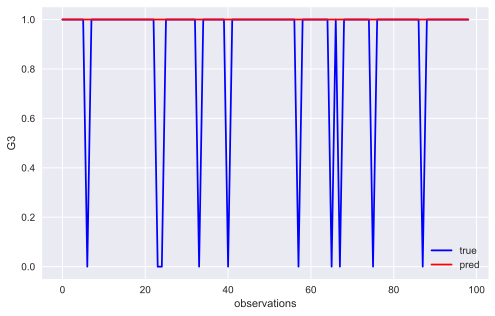

In [100]:
plot_comparison(testDependentVariables_category_scale_binary,predictedDependentVariables_category_scale_binary)

Confusion matrix, without normalization
[[  0  30]
 [  0 284]]


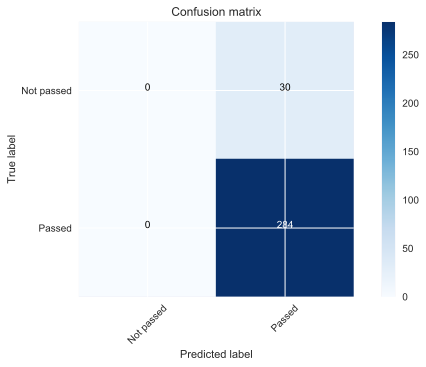

In [101]:
c_matrix = metrics.confusion_matrix(testDependentVariables_category_scale_binary, 
                            predictedDependentVariables_category_scale_binary)
class_names = ['Not passed','Passed']

plot_confusion_matrix(c_matrix, classes=class_names,
                      title='Confusion matrix')

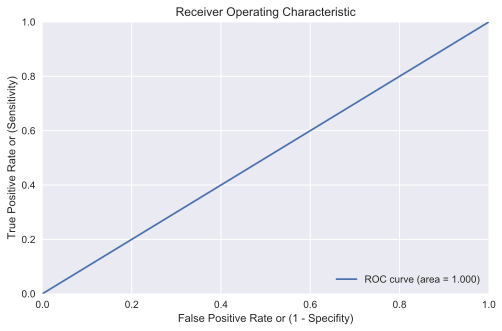

In [102]:
plot_roc(testDependentVariables_category_scale_binary, predictedDependentVariables_category_scale_binary)

In [103]:
classification_metrics(testDependentVariables_category_scale_binary,
                       predictedDependentVariables_category_scale_binary,
                       target_names=class_names)

             precision    recall  f1-score   support

 Not passed       0.00      0.00      0.00        30
     Passed       0.90      1.00      0.95       284

avg / total       0.82      0.90      0.86       314

accuracy_score: 0.904458598726


### Логистическая регрессия

In [104]:
c_values = np.logspace(-2, 3, 500)

logisticModel = linear_model.LogisticRegressionCV(Cs=c_values, cv=5, scoring='f1')
logisticModel.fit(trainData_category_scale_binary, trainDependentVariables_category_scale_binary)

predictedDependentVariables_category_scale_binary = logisticModel.predict(testData_category_scale_binary)

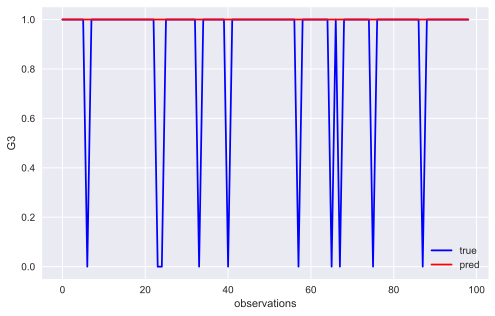

In [105]:
plot_comparison(testDependentVariables_category_scale_binary,predictedDependentVariables_category_scale_binary)

Confusion matrix, without normalization
[[  1  29]
 [  1 283]]


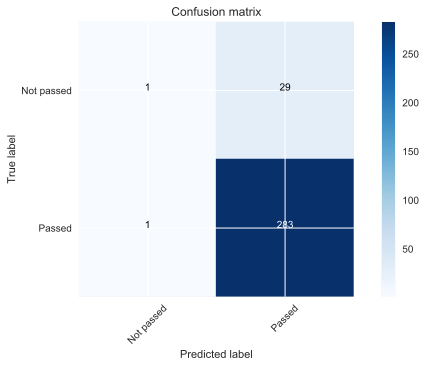

In [106]:
c_matrix = metrics.confusion_matrix(testDependentVariables_category_scale_binary, 
                            predictedDependentVariables_category_scale_binary)
class_names = ['Not passed','Passed']

plot_confusion_matrix(c_matrix, classes=class_names,
                      title='Confusion matrix')

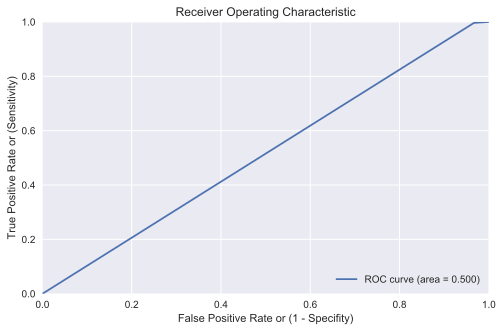

In [107]:
plot_roc(testDependentVariables_category_scale_binary, predictedDependentVariables_category_scale_binary)

In [108]:
classification_metrics(testDependentVariables_category_scale_binary,
                       predictedDependentVariables_category_scale_binary,
                       target_names=class_names)

             precision    recall  f1-score   support

 Not passed       0.50      0.03      0.06        30
     Passed       0.91      1.00      0.95       284

avg / total       0.87      0.90      0.86       314

accuracy_score: 0.904458598726


### Дерево решений

In [109]:
param_grid = {'max_depth': range(1, 11), 
              'max_features': range(1, 26)}

treeModelCV = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='f1', verbose=1)
treeModelCV.fit(trainData_category_scale_binary,trainDependentVariables_category_scale_binary)

predictedDependentVariables_category_scale_binary = treeModelCV.predict(testData_category_scale_binary)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


[Parallel(n_jobs=1)]: Done 1250 out of 1250 | elapsed:    9.3s finished


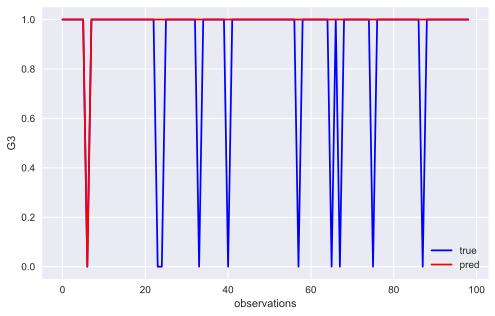

In [110]:
plot_comparison(testDependentVariables_category_scale_binary,predictedDependentVariables_category_scale_binary)

Confusion matrix, without normalization
[[  2  28]
 [  3 281]]


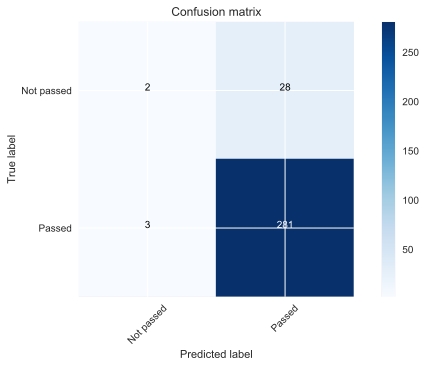

In [111]:
c_matrix = metrics.confusion_matrix(testDependentVariables_category_scale_binary, 
                            predictedDependentVariables_category_scale_binary)
class_names = ['Not passed','Passed']

plot_confusion_matrix(c_matrix, classes=class_names,
                      title='Confusion matrix')

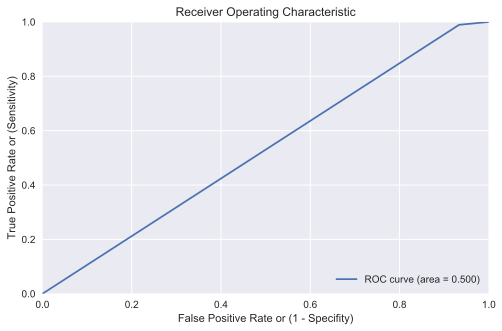

In [112]:
plot_roc(testDependentVariables_category_scale_binary, predictedDependentVariables_category_scale_binary)

In [113]:
classification_metrics(testDependentVariables_category_scale_binary,
                       predictedDependentVariables_category_scale_binary,
                       target_names=class_names)

             precision    recall  f1-score   support

 Not passed       0.40      0.07      0.11        30
     Passed       0.91      0.99      0.95       284

avg / total       0.86      0.90      0.87       314

accuracy_score: 0.90127388535


### Random Forest'

In [114]:
param_grid = {"n_estimators": [10,20,30],
              "max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False]}

grid_forest = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, verbose=1)

grid_forest.fit(trainData_category_scale_binary,
                trainDependentVariables_category_scale_binary)

predictedDependentVariables_category_scale_binary = grid_forest.predict(testData_category_scale_binary)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=1)]: Done 1620 out of 1620 | elapsed:  2.6min finished


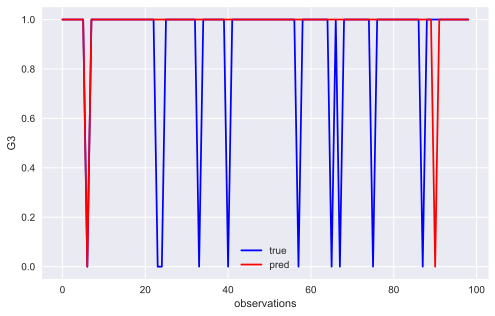

In [115]:
plot_comparison(testDependentVariables_category_scale_binary,predictedDependentVariables_category_scale_binary)

Confusion matrix, without normalization
[[  1  29]
 [  4 280]]


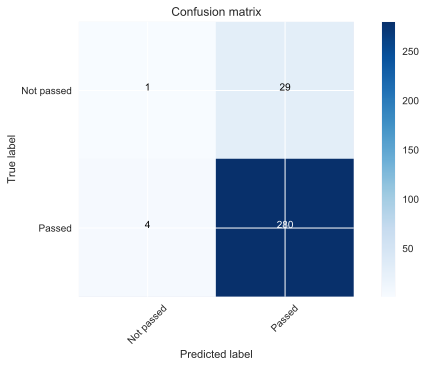

In [116]:
c_matrix = metrics.confusion_matrix(testDependentVariables_category_scale_binary, 
                            predictedDependentVariables_category_scale_binary)
class_names = ['Not passed','Passed']

plot_confusion_matrix(c_matrix, classes=class_names,
                      title='Confusion matrix')

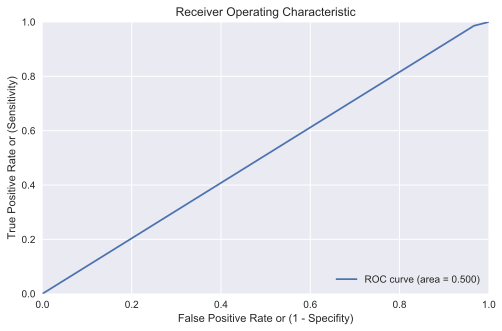

In [117]:
plot_roc(testDependentVariables_category_scale_binary, predictedDependentVariables_category_scale_binary)

In [118]:
classification_metrics(testDependentVariables_category_scale_binary,
                       predictedDependentVariables_category_scale_binary,
                       target_names=class_names)

             precision    recall  f1-score   support

 Not passed       0.20      0.03      0.06        30
     Passed       0.91      0.99      0.94       284

avg / total       0.84      0.89      0.86       314

accuracy_score: 0.894904458599


**Итоги:**

Наилучший результат показала логистическая регрессия. В данном задании почти все модели просто относили всех к сдавшим, что и понятно, потому что выборка нерепрезентабельна, где несдавших можно считать выбросами. 

### Задание 3.  Многоклассовая классификация
  
Решите задачу многоклассовой классификации: постройте модель, предсказывающую оценку студента по предмету по 4 балльной шкале
* Отлично: 18 <= `G3` <= 20
* Хорошо: 14 <= `G3` <= 17
* Удовлетворительно: 8 <= `G3` <= 13
* Неудовлетворительно: `G3` < 8  
  
При решении зачачи нельзя использовать признаки `G1` и `G2`.  
  
При решении задачи рассмотрите различные модели: методы ближайших соседей, логистическую регрессию, деревья решений. На кросс-валидации подберите оптимальные значения гиперпараметров алгоритмов. 

In [119]:
def four_marks(value):
    if (value>=18):
        return 5
    elif (value>=14):
        return 4
    elif (value>=8):
        return 3
    else:
        return 2

ml_data_category_scale_multi = ml_data_category_scale.drop('G3',axis=1)
ml_data_category_scale_multi['assessment'] = data.G3.apply(four_marks)
ml_data_category_scale_multi.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,...,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,assessment
0,-0.09325,-0.489801,-0.618693,1.840259,-0.643921,-0.09325,-0.569976,-0.670820,-0.533041,1.913299,-0.47774,-0.291957,-0.786514,1.835266,-0.377137,-0.25127,-0.202182,0.887508,-0.623136,-0.257671,...,-0.509263,-0.447214,1.281810,0.593575,-0.875498,-0.585820,0.612776,0.643921,-2.761901,-0.403106,-0.358676,-1.258634,-0.516711,-0.988571,0.500299,0.305276,0.512244,-0.742471,1.218799,4
1,-0.09325,-0.489801,-0.618693,1.840259,-0.643921,-0.09325,-0.569976,1.490712,-0.533041,-0.522657,-0.47774,-0.291957,1.271433,-0.544880,-0.377137,-0.25127,-0.202182,0.887508,-0.623136,-0.257671,...,1.963623,-0.447214,-0.780147,0.593575,-0.875498,0.221035,0.612776,0.643921,0.362069,-0.403106,-0.358676,-1.258634,-0.516711,1.011561,-1.998803,0.305276,0.512244,-0.742471,-0.392275,4
2,-0.09325,2.041646,-0.618693,-0.543402,-0.643921,-0.09325,-0.569976,1.490712,-0.533041,-0.522657,-0.47774,3.425158,-0.786514,-0.544880,-0.377137,-0.25127,-0.202182,-1.126750,1.604787,-0.257671,...,-0.509263,-0.447214,1.281810,0.593575,1.142207,-0.585820,0.612776,-1.552986,0.362069,2.646477,-0.358676,-1.258634,-0.516711,-0.988571,-1.998803,0.305276,0.512244,-0.742471,-0.714489,3
3,-0.09325,-0.489801,1.616310,-0.543402,-0.643921,-0.09325,-0.569976,-0.670820,1.876028,-0.522657,-0.47774,-0.291957,1.271433,-0.544880,-0.377137,-0.25127,-0.202182,-1.126750,1.604787,-0.257671,...,1.963623,-0.447214,-0.780147,-1.684706,1.142207,0.221035,0.612776,0.643921,0.362069,-0.403106,-0.358676,-1.258634,-0.516711,1.011561,0.500299,0.305276,0.512244,-0.742471,-0.070060,4
4,-0.09325,2.041646,-0.618693,-0.543402,-0.643921,-0.09325,1.754459,-0.670820,-0.533041,-0.522657,2.09319,-0.291957,-0.786514,-0.544880,-0.377137,-0.25127,-0.202182,0.887508,-0.623136,-0.257671,...,-0.509263,-0.447214,1.281810,0.593575,-0.875498,-0.585820,0.612776,0.643921,0.362069,-0.403106,-0.358676,0.794512,-0.516711,-0.988571,0.500299,0.305276,-1.952194,-0.742471,-0.392275,3


**Разделим данные на обучающие и тестовые**

In [120]:
# Стандартизованные данные без G1, с бинаризацией категорических признаков
# и несколькими классами
(trainData_category_scale_multi, 
 testData_category_scale_multi, 
 trainDependentVariables_category_scale_multi, 
 testDependentVariables_category_scale_multi) = \
train_test_split(ml_data_category_scale_multi.drop('assessment', 
                                                    axis=1),
                                            ml_data_category_scale_multi['assessment'],
                                            test_size=0.3, 
                                            random_state=15)

### Метод ближайших соседей.

In [121]:
param_grid = {'n_neighbors': range(1, 101), 
              'weights': ['uniform', 'distance']}

neighModelCV = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='f1_macro', verbose=1)

neighModelCV.fit(trainData_category_scale_multi,trainDependentVariables_category_scale_multi)

predictedDependentVariables_category_scale_multi = neighModelCV.predict(testData_category_scale_multi)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  3.5min finished


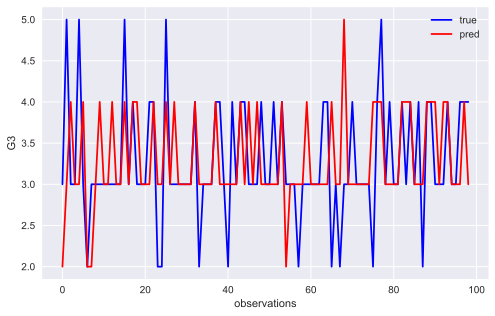

In [122]:
plot_comparison(testDependentVariables_category_scale_multi,predictedDependentVariables_category_scale_multi)

Confusion matrix, without normalization
[[  2  25   3   0]
 [  6 149  32   1]
 [  0  45  36   2]
 [  0   7   6   0]]


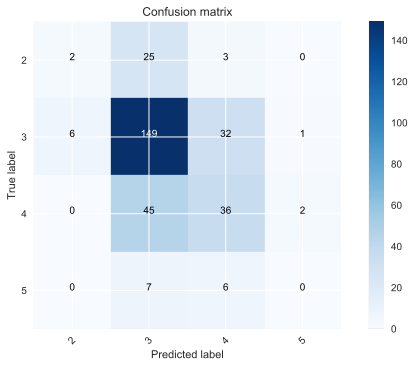

In [123]:
c_matrix = metrics.confusion_matrix(testDependentVariables_category_scale_multi, 
                            predictedDependentVariables_category_scale_multi)
class_names = ['2','3','4','5']

plot_confusion_matrix(c_matrix, classes=class_names,
                      title='Confusion matrix')

In [124]:
classification_metrics(testDependentVariables_category_scale_multi,
                       predictedDependentVariables_category_scale_multi,
                       target_names=class_names)

             precision    recall  f1-score   support

          2       0.25      0.07      0.11        30
          3       0.66      0.79      0.72       188
          4       0.47      0.43      0.45        83
          5       0.00      0.00      0.00        13

avg / total       0.54      0.60      0.56       314

accuracy_score: 0.595541401274


### Логистическая регрессия.

In [125]:
c_values = np.logspace(-2, 3, 500)

logisticModel = linear_model.LogisticRegressionCV(Cs=c_values, cv=5, scoring='f1_macro')
logisticModel.fit(trainData_category_scale_multi, trainDependentVariables_category_scale_multi)

predictedDependentVariables_category_scale_multi = logisticModel.predict(testData_category_scale_multi)

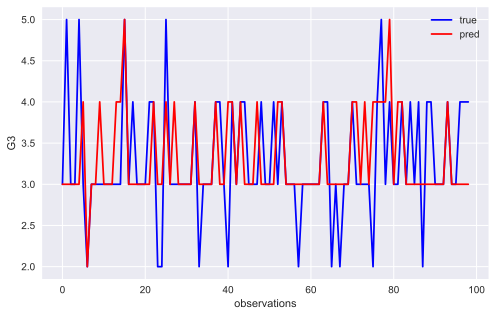

In [126]:
plot_comparison(testDependentVariables_category_scale_multi,predictedDependentVariables_category_scale_multi)

Confusion matrix, without normalization
[[  6  22   2   0]
 [  6 153  29   0]
 [  0  43  37   3]
 [  0   7   5   1]]


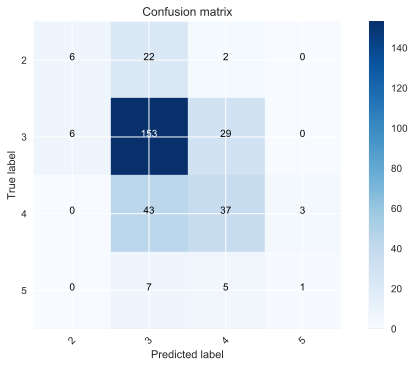

In [127]:
c_matrix = metrics.confusion_matrix(testDependentVariables_category_scale_multi, 
                            predictedDependentVariables_category_scale_multi)
class_names = ['2','3','4','5']

plot_confusion_matrix(c_matrix, classes=class_names,
                      title='Confusion matrix')

In [128]:
classification_metrics(testDependentVariables_category_scale_multi,
                       predictedDependentVariables_category_scale_multi,
                       target_names=class_names)

             precision    recall  f1-score   support

          2       0.50      0.20      0.29        30
          3       0.68      0.81      0.74       188
          4       0.51      0.45      0.47        83
          5       0.25      0.08      0.12        13

avg / total       0.60      0.63      0.60       314

accuracy_score: 0.627388535032


### Дерево решений.

In [129]:
param_grid = {'max_depth': range(1, 11), 
              'max_features': range(1, 26)}

treeModelCV = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='f1_macro', verbose=1)
treeModelCV.fit(trainData_category_scale_multi,trainDependentVariables_category_scale_multi)

predictedDependentVariables_category_scale_multi = treeModelCV.predict(testData_category_scale_multi)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


[Parallel(n_jobs=1)]: Done 1250 out of 1250 | elapsed:   15.6s finished


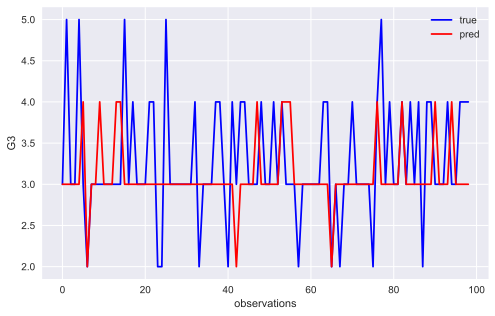

In [130]:
plot_comparison(testDependentVariables_category_scale_multi,predictedDependentVariables_category_scale_multi)

Confusion matrix, without normalization
[[  5  24   1   0]
 [  4 168  16   0]
 [  1  68  13   1]
 [  0  12   1   0]]


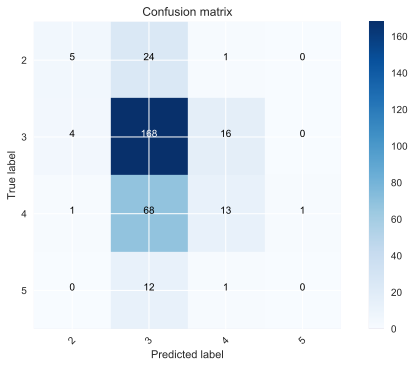

In [131]:
c_matrix = metrics.confusion_matrix(testDependentVariables_category_scale_multi, 
                            predictedDependentVariables_category_scale_multi)
class_names = ['2','3','4','5']

plot_confusion_matrix(c_matrix, classes=class_names,
                      title='Confusion matrix')

In [132]:
classification_metrics(testDependentVariables_category_scale_multi,
                       predictedDependentVariables_category_scale_multi,
                       target_names=class_names)

             precision    recall  f1-score   support

          2       0.50      0.17      0.25        30
          3       0.62      0.89      0.73       188
          4       0.42      0.16      0.23        83
          5       0.00      0.00      0.00        13

avg / total       0.53      0.59      0.52       314

accuracy_score: 0.592356687898


### Random Forest.

In [133]:
param_grid = {"n_estimators": [10,20,30],
              "max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False]}

grid_forest = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, verbose=1)

grid_forest.fit(trainData_category_scale_multi,
                trainDependentVariables_category_scale_multi)

predictedDependentVariables_category_scale_multi = grid_forest.predict(testData_category_scale_multi)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=1)]: Done 1620 out of 1620 | elapsed:  3.1min finished


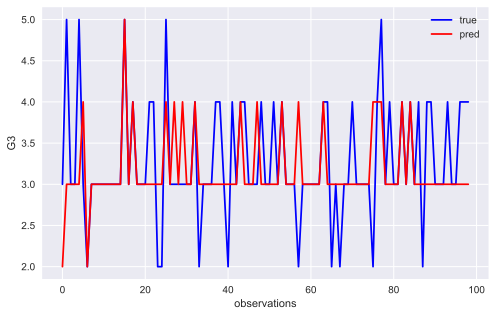

In [134]:
plot_comparison(testDependentVariables_category_scale_multi,predictedDependentVariables_category_scale_multi)

Confusion matrix, without normalization
[[  1  27   2   0]
 [  2 171  15   0]
 [  0  57  25   1]
 [  0   8   4   1]]


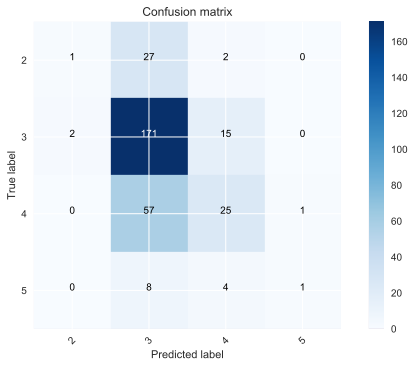

In [135]:
c_matrix = metrics.confusion_matrix(testDependentVariables_category_scale_multi, 
                            predictedDependentVariables_category_scale_multi)
class_names = ['2','3','4','5']

plot_confusion_matrix(c_matrix, classes=class_names,
                      title='Confusion matrix')

In [136]:
classification_metrics(testDependentVariables_category_scale_multi,
                       predictedDependentVariables_category_scale_multi,
                       target_names=class_names)

             precision    recall  f1-score   support

          2       0.33      0.03      0.06        30
          3       0.65      0.91      0.76       188
          4       0.54      0.30      0.39        83
          5       0.50      0.08      0.13        13

avg / total       0.59      0.63      0.57       314

accuracy_score: 0.630573248408


**Итоги:**

Наилучший результат показали два метода: Дерево решений и Random Forest.

### Notes  
  
* Для оценки качества моделей используйте соответствующие задаче метрики, которые рассматривались на занятиях. Для кросс-валидации выберите ту метрику, которая кажется вам наиболее подходящей и аргументируйте свой выбор.  
  
  
* __Tip:__ Возможно, будет полезно решать задачи и строить модели отдельно для каждого предмета, а не для целого датасета.  
  

* __Tip:__ Бинаризация категориальных признаков и другие модификации признаков и feature engineering могут повысить качество решения.
  
  
* __Бонусное задание:__ В заданиях 1 - 3 в качестве одной из моделей попробуйте Random Forest.